# Real estate price estimation 

### Dataset : https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

#### Import the necessary libraries

In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

#### Load the data

In [5]:
df1 = pd.read_csv("dataset.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df1.shape

(13320, 9)

#### Data Cleaning

In [7]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
df2 = df1.drop(['area_type','society','availability'],axis = 'columns')
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [11]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [13]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [14]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [19]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [21]:
df3['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [22]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [23]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [24]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [27]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [29]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [33]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [34]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
balcony               0
price               186
bhk                   4
Name: 30, dtype: object

#### Feature Engineering

In [42]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [44]:
len(df5.location.unique())

1265

In [47]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                              515
Sarjapur  Road                          372
Electronic City                         302
Kanakpura Road                          261
Thanisandra                             234
                                       ... 
Kodanda Reddy Layout                      1
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
1 Annasandrapalya                         1
Name: location, Length: 1254, dtype: int64

In [48]:
len(location_stats[location_stats<10])

1007

In [54]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Kalkere                                 10
Dairy Circle                            10
1st Block Koramangala                   10
Ganga Nagar                             10
Basapura                                10
                                        ..
Kodanda Reddy Layout                     1
Kirloskar layout, Basaveshwarnagar       1
Kengeri Satellite Town Stage II          1
Kengeri Satellite Town KHB Apartment     1
1 Annasandrapalya                        1
Name: location, Length: 1017, dtype: int64

In [51]:
len(df5.location.unique())

1254

In [52]:
df5.location = df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

238

In [57]:
df5.head(10)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.888889
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.000000


In [58]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [59]:
df5.shape

(12710, 8)

In [62]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12055, 8)

In [63]:
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [68]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7 = remove_outliers(df6)
df7.shape

(9848, 8)

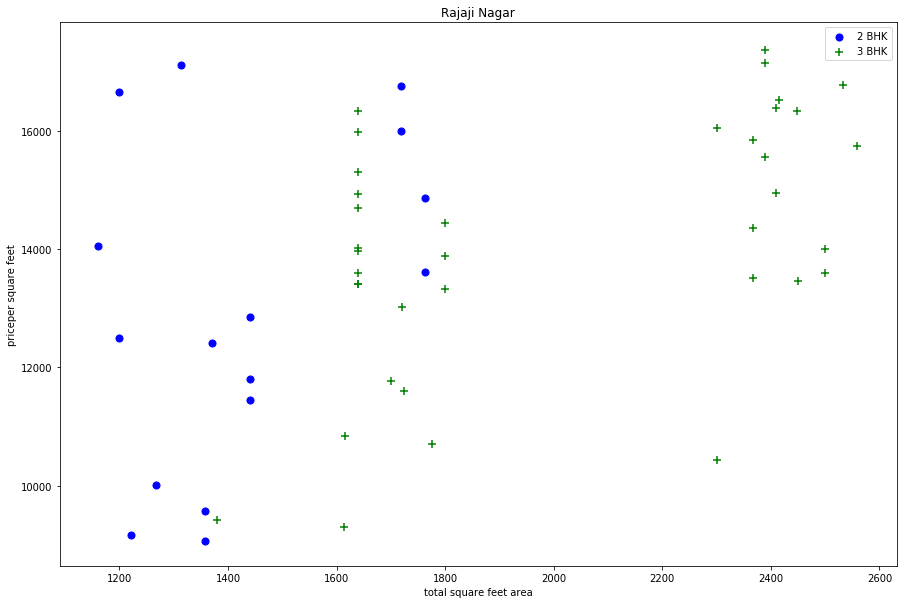

In [73]:
def scatter_plot(df,location):
    bhk2 = df[(df.location==location)& (df.bhk==2)]
    bhk3 = df[(df.location==location)& (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label = '2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+',color='green',label = '3 BHK',s=50)
    plt.xlabel("total square feet area")
    plt.ylabel("priceper square feet")
    plt.title(location)
    plt.legend()
    

scatter_plot(df7,"Rajaji Nagar")

#### Remove 2bhk appartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [74]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7025, 8)

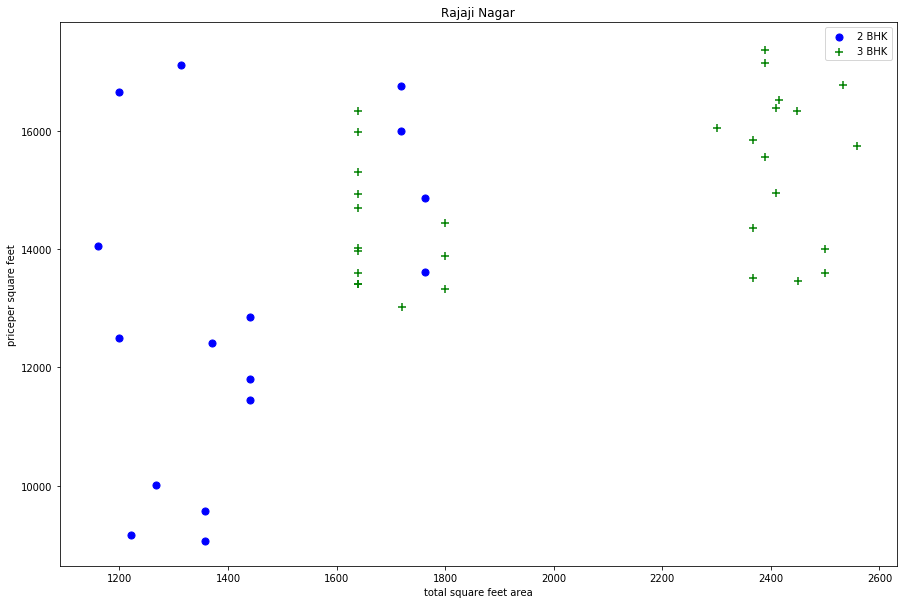

In [76]:
scatter_plot(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

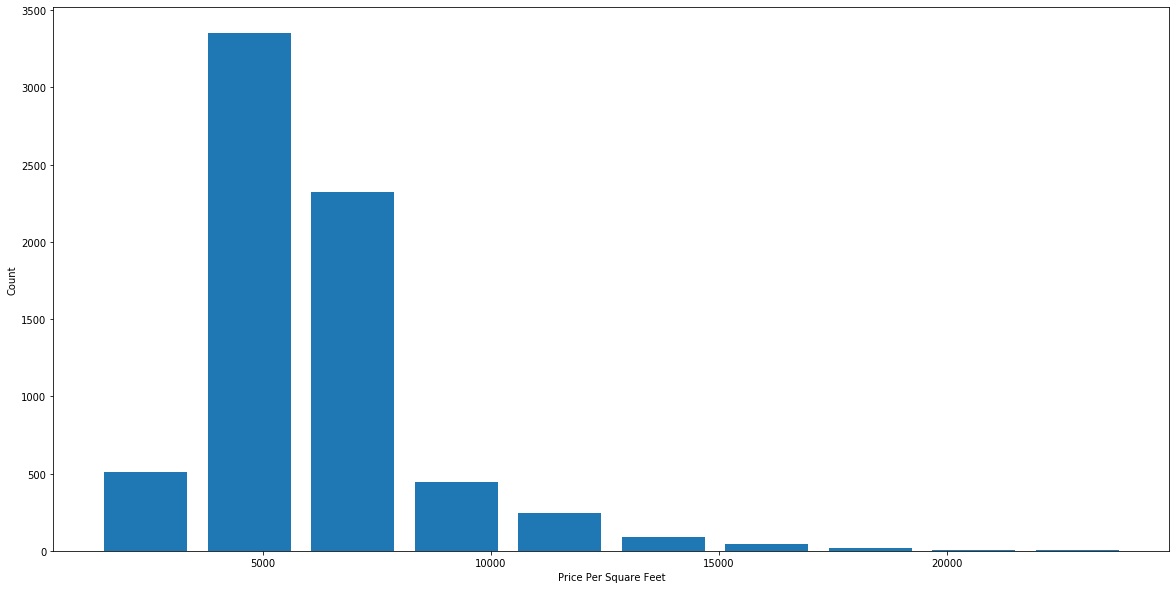

In [77]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [78]:
#Outlier Removal Using Bathrooms Feature
df8.bath.unique()


array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

Text(0, 0.5, 'Count')

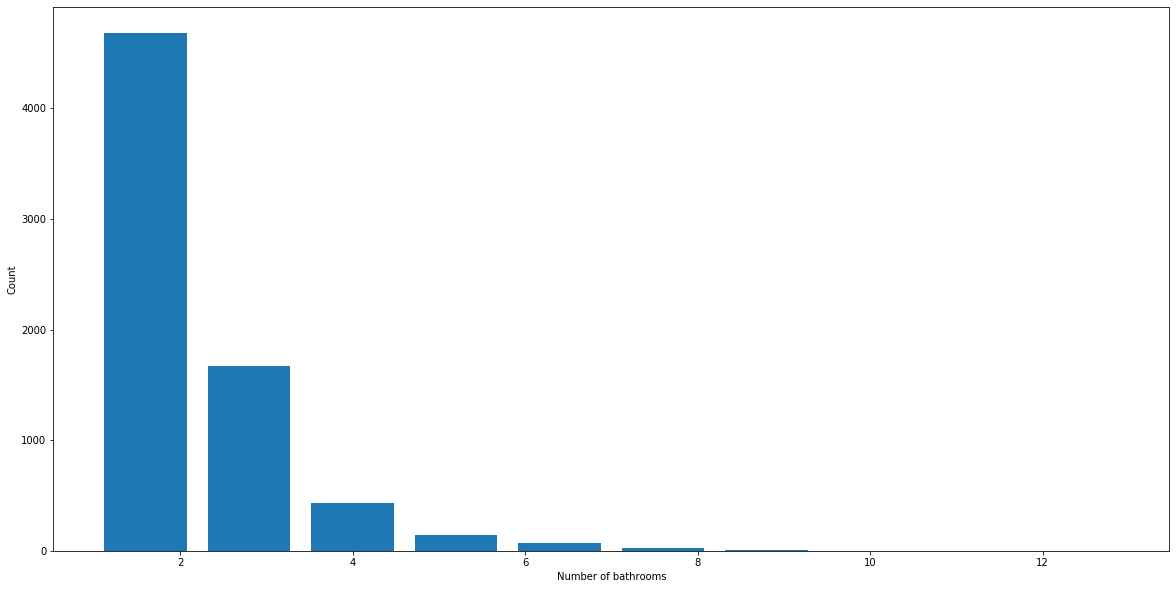

In [80]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [82]:
df8[df8.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9269,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


In [83]:
df8[df8.bath>df8.bhk+2]


,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1542,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6450,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8091,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [85]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(6958, 8)

In [86]:
df9.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [88]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3


### Use One Hot Encoding For Location


In [92]:
dummies = pd.get_dummies(df10.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [94]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(10)

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Phase JP Nagar,2065.0,4.0,1.0,210.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1st Phase JP Nagar,2059.0,3.0,2.0,225.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
df12 = df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Building a model

In [96]:
X = df12.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
y = df12.price
y.head()


0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [99]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8584587986234865

#### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [100]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.8773143 , 0.84355571, 0.78319592, 0.89718661, 0.8720526 ])

#### Testing the model for different properties 

In [101]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [102]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

94.31509246364473

In [103]:
predict_price('Indira Nagar',1000, 3, 3)

168.66558419122612